In [1]:
import pandas as pd
import numpy as np
import matplotlib as mat
import plotly as pl
import kagglehub
from kagglehub import KaggleDatasetAdapter
import json
import os
from datetime import datetime, timedelta

In [2]:
# wczytanie datasetu i wyswietlenie 5 pierwszych wierszy
file_path = "btc_1d_data_2018_to_2025.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "novandraanugrah/bitcoin-historical-datasets-2018-2024",
  file_path,
  pandas_kwargs={"delimiter" : ","}
)

df.head()

/tmp/ipython-input-1706981744.py:4: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 465k/465k [00:00<00:00, 517kB/s]


,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,2018-01-01 00:00:00.000000 UTC,13715.65,13818.55,12750.00,13380.00,8609.915844,2018-01-01 23:59:59.999000 UTC,1.147997e+08,105595,3961.938946,5.280975e+07,0
1,2018-01-02 00:00:00.000000 UTC,13382.16,15473.49,12890.02,14675.11,20078.092111,2018-01-02 23:59:59.999000 UTC,2.797171e+08,177728,11346.326739,1.580801e+08,0
2,2018-01-03 00:00:00.000000 UTC,14690.00,15307.56,14150.00,14919.51,15905.667639,2018-01-03 23:59:59.999000 UTC,2.361169e+08,162787,8994.953566,1.335873e+08,0
3,2018-01-04 00:00:00.000000 UTC,14919.51,15280.00,13918.04,15059.54,21329.649574,2018-01-04 23:59:59.999000 UTC,3.127816e+08,170310,12680.812951,1.861168e+08,0
4,2018-01-05 00:00:00.000000 UTC,15059.56,17176.24,14600.00,16960.39,23251.491125,2018-01-05 23:59:59.999000 UTC,3.693220e+08,192969,13346.622293,2.118299e+08,0


In [61]:
# wartość maksymalna z kolumny low, wartość najmniejsza z kolumny low, średnia dla kolumny low
max = np.max(df["Low"])
min = np.min(df["Low"])
mean = np.mean(df["Low"])

print(max)
print(min)
print(mean)

124600.0
3156.26
35187.682057382786


In [62]:
# liczba elementów w kolumnie high, mediana, odchylenie standardowe
count = len(df["High"])
median = np.median(df["High"])
stddeviation = np.std(df["High"])

print(count)
print(median)
print(stddeviation)

2858
27209.805
31817.015029733775


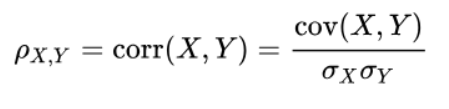

In [8]:
# wariancja, korelacja
variance = np.var(df["High"])
cor = np.corrcoef(df["High"], df["Low"])[0,1]

print(variance)
print(cor)

1012322445.402305
0.999098338510646


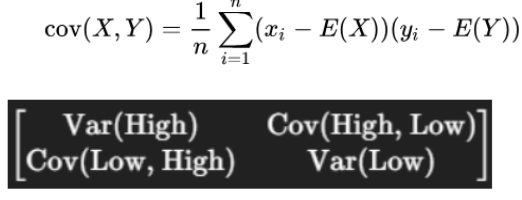

In [9]:
covariance = np.cov(df["High"], df["Low"])
covariance

array([[1.01267678e+09, 9.84533226e+08],
       [9.84533226e+08, 9.58900247e+08]])

Równanie 1

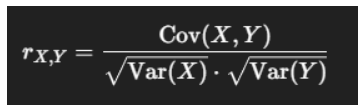

In [13]:
# współczynnik korelacji między tymi dwiema kolumnami, obliczenie korelacji z pomocą corrcoef oraz wg równania 1
cor1 = np.corrcoef(df["High"], df["Low"])[0,1]
cor2 = covariance[0,1] / (np.sqrt(covariance[0,0]) * np.sqrt(covariance[1,1]))

print(cor1)
print(cor2)

0.999098338510646
0.999098338510646


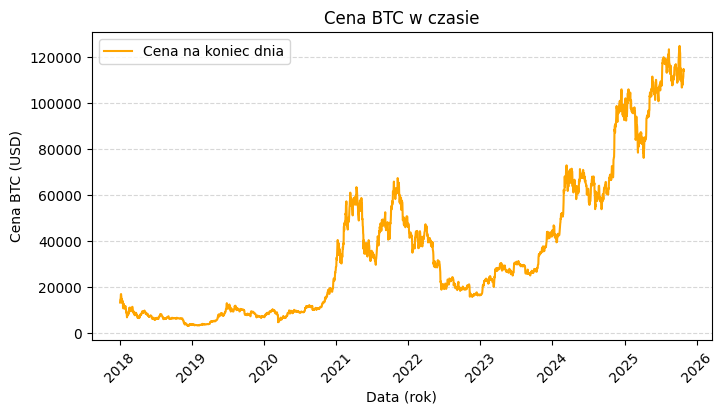

In [17]:
# wykres liniowy — zmiany ceny w czasie
df["Open time"] = pd.to_datetime(df["Open time"])
mat.pyplot.figure(figsize=(8,4))
mat.pyplot.plot(df["Open time"], df["Close"], label="Cena na koniec dnia", color='orange')
mat.pyplot.xlabel("Data (rok)")
mat.pyplot.ylabel("Cena BTC (USD)")
mat.pyplot.title("Cena BTC w czasie")

ax = mat.pyplot.gca()
ax.xaxis.set_major_locator(mat.dates.YearLocator())
ax.xaxis.set_major_formatter(mat.dates.DateFormatter("%Y"))
mat.pyplot.xticks(rotation=45)

mat.pyplot.grid(axis='y', linestyle='--', alpha=0.5)

mat.pyplot.legend()
mat.pyplot.show()

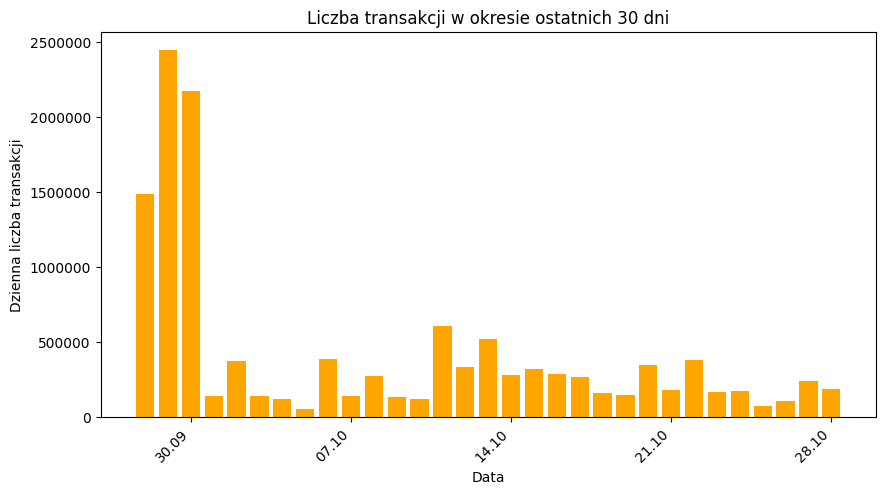

In [24]:
# wykres słupkowy — porównanie liczby transakcji w ciągu ostatnich 30 dni
df["Open time"] = pd.to_datetime(df["Open time"]).dt.tz_localize(None)
last_date = df["Open time"].max()
start_date = last_date - timedelta(days=30)
df_last_30 = df[df["Open time"].between(start_date, last_date)]

mat.pyplot.figure(figsize=(10,5))
mat.pyplot.bar(df_last_30["Open time"], df_last_30["Number of trades"], color="orange")

mat.pyplot.title("Liczba transakcji w okresie ostatnich 30 dni")
mat.pyplot.xlabel("Data")
mat.pyplot.ylabel("Dzienna liczba transakcji")

mat.pyplot.ticklabel_format(style='plain', axis='y')

ax = mat.pyplot.gca()
ax.xaxis.set_major_locator(mat.dates.WeekdayLocator(interval=1))
ax.xaxis.set_major_formatter(mat.dates.DateFormatter("%d.%m"))
mat.pyplot.xticks(rotation=45, ha='right')

mat.pyplot.show()


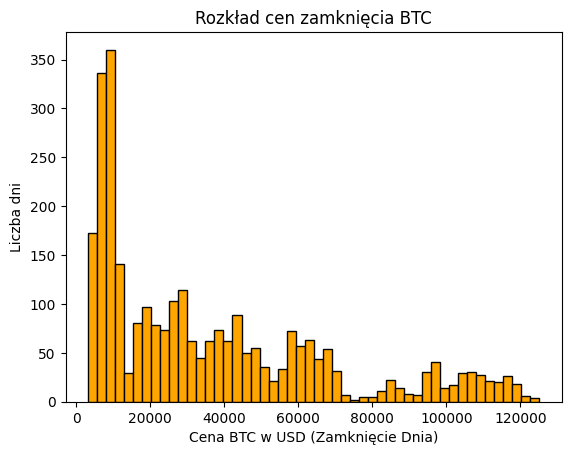

In [26]:
# histogram - rozkład cen zamknięcia
mat.pyplot.hist(df["Close"], bins=50, color='orange', edgecolor='black')
mat.pyplot.title("Rozkład cen zamknięcia BTC")
mat.pyplot.xlabel("Cena BTC w USD (Zamknięcie Dnia)")
mat.pyplot.ylabel("Liczba dni")
mat.pyplot.show()


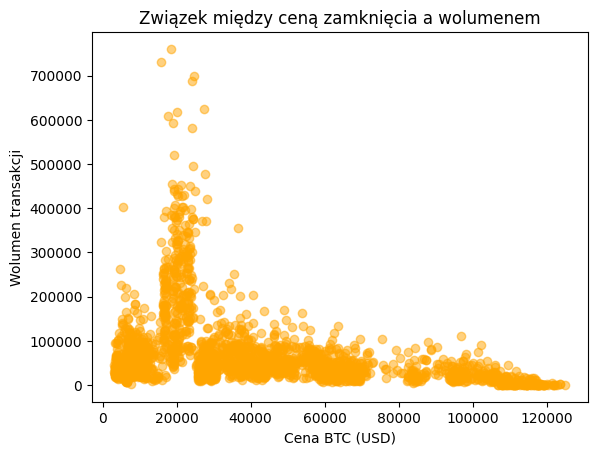

In [27]:
# scatter plot - związek między ceną zamknięcia a wolumenem
mat.pyplot.scatter(df["Close"], df["Volume"], alpha=0.5, color='orange')
mat.pyplot.title("Związek między ceną zamknięcia a wolumenem")
mat.pyplot.xlabel("Cena BTC (USD)")
mat.pyplot.ylabel("Wolumen transakcji")
mat.pyplot.show()


**Zadanie - Wizualizacja danych za pomocą Python (wykresy podstawowe)**

In [35]:
import matplotlib.pyplot as plt
import numpy as np

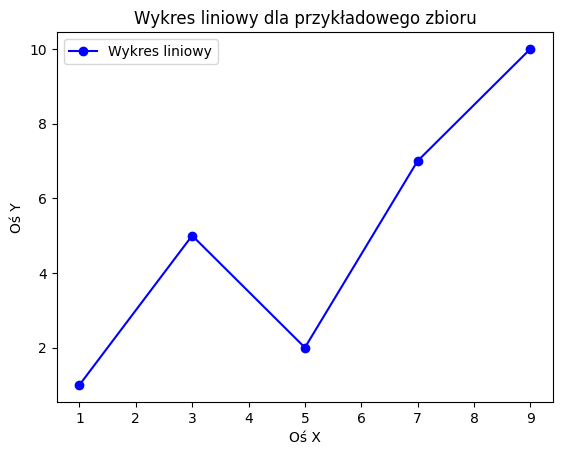

In [34]:
x = [1, 3, 5, 7, 9]
y = [1, 5, 2, 7, 10]

plt.plot(x, y, marker="o", linestyle="-", color="blue", label="Wykres liniowy")

plt.title("Wykres liniowy dla przykładowego zbioru")
plt.xlabel("Oś X")
plt.ylabel("Oś Y")
plt.legend()
plt.show()

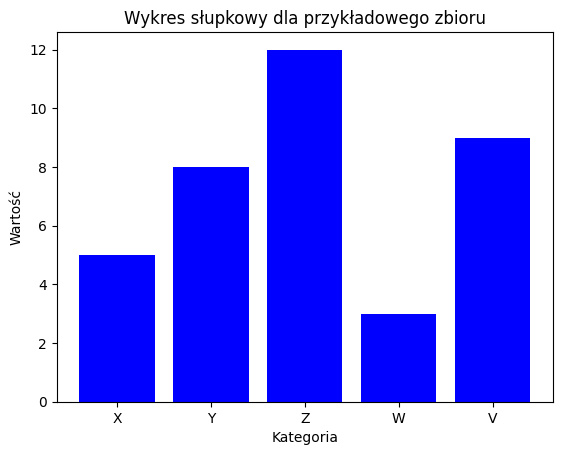

In [37]:
kategorie = ["X", "Y", "Z", "W", "V"]
wartosci = [5, 8, 12, 3, 9]

plt.bar(kategorie, wartosci, color="blue")
plt.xlabel("Kategoria")
plt.ylabel("Wartość")
plt.title("Wykres słupkowy dla przykładowego zbioru")
plt.show()

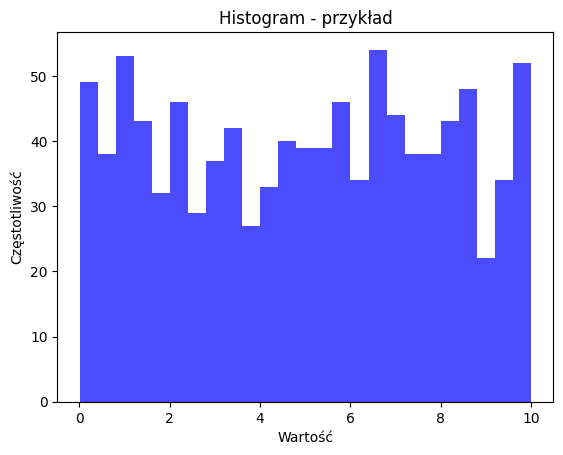

In [38]:
data = np.random.uniform(0, 10, 1000)

plt.hist(data, bins=25, color="blue", alpha=0.7)
plt.xlabel("Wartość")
plt.ylabel("Częstotliwość")
plt.title("Histogram - przykład")
plt.show()

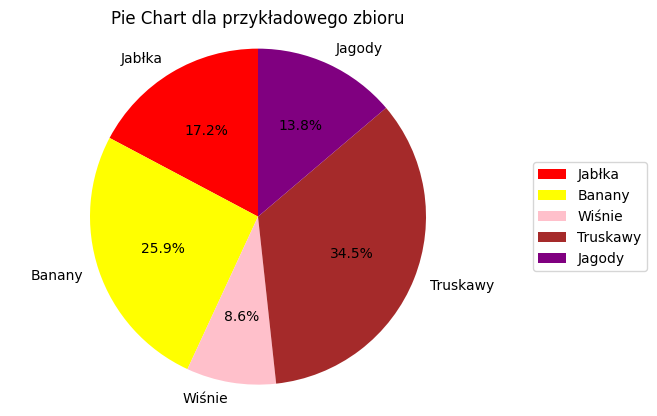

In [39]:
categories = ["Jabłka", "Banany", "Wiśnie", "Truskawy", "Jagody"]
values = [10, 15, 5, 20, 8]

plt.pie(values, labels=categories, startangle=90, autopct="%1.1f%%", colors=["red", "yellow", "pink", "brown", "purple"])
plt.axis("equal")
plt.title("Pie Chart dla przykładowego zbioru")
plt.legend(categories, bbox_to_anchor=(1.04, 0.5), loc='center left')
plt.show()

**Zadanie - Wizualizacja danych za pomocą Python (wykresy zaawansowane)**

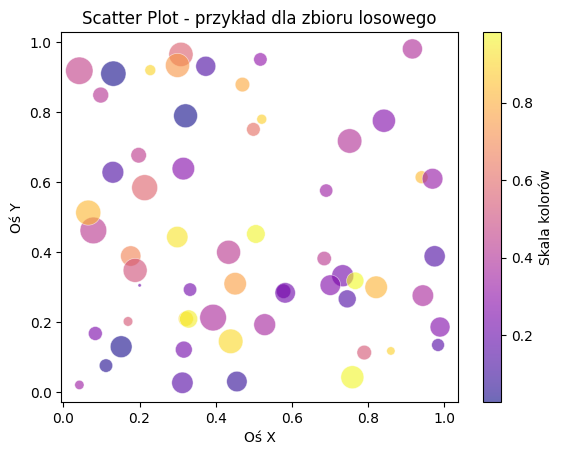

In [41]:
x = np.random.rand(60)
y = np.random.rand(60)
sizes = 400 * np.random.rand(60)  # bubble sizes
colors = np.random.rand(60)

plt.scatter(x, y, s=sizes, c=colors, alpha=0.6, cmap="plasma", edgecolors="w", linewidth=0.5)
plt.colorbar(label="Skala kolorów")
plt.xlabel("Oś X")
plt.ylabel("Oś Y")
plt.title("Scatter Plot - przykład dla zbioru losowego")
plt.show()

Text(0.5, 0, 'Z')

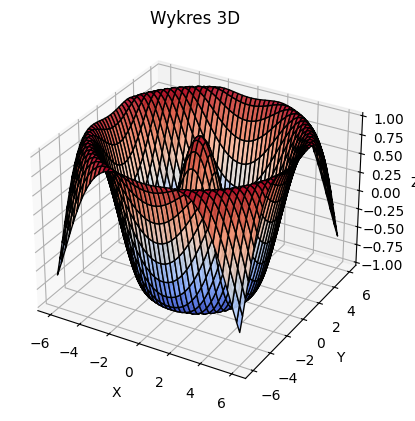

In [43]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

x = np.linspace(-6, 6, 120)
y = np.linspace(-6, 6, 120)
X, Y = np.meshgrid(x, y)
Z = np.cos(np.sqrt(X**2 + Y**2))

surf = ax.plot_surface(X, Y, Z, cmap="coolwarm", edgecolor="k", alpha=0.9)

ax.set_title("Wykres 3D")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

**Zadanie - Wizualizacja danych za pomocą Python (Plotnine)**

In [44]:
from plotnine import *
import pandas as pd
import numpy as np

In [45]:
data = pd.DataFrame({
    "x": [1, 2.65, 3, 4, 5, 11],
    "y": [5, 3.9, 8, 2.2, 7, 8.5]
})

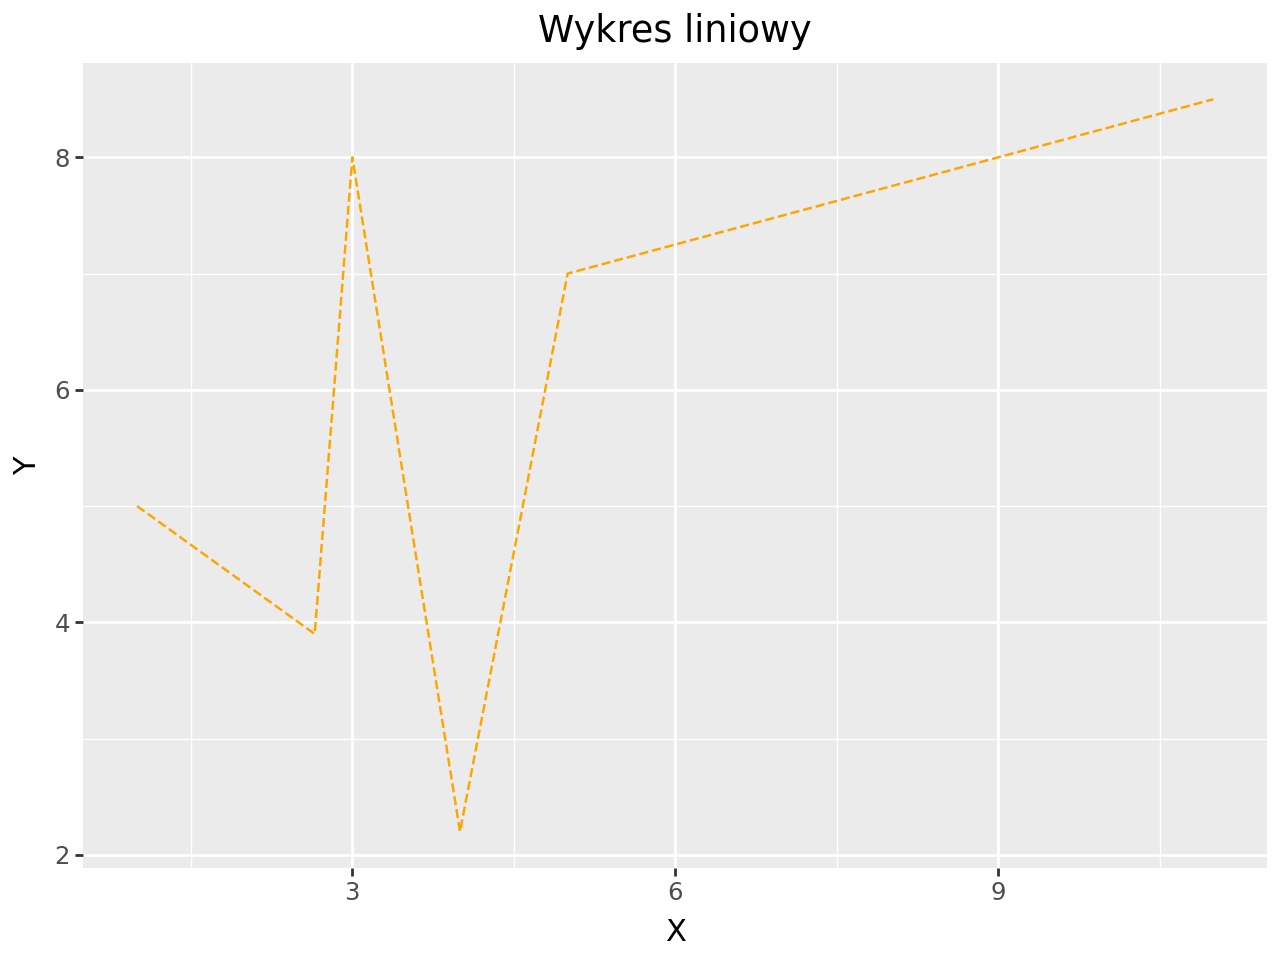

In [47]:
ggplot(data) + aes(x="x", y="y") + geom_line(color="orange", linetype="dashed") + ggtitle("Wykres liniowy") + xlab("X") + ylab("Y")

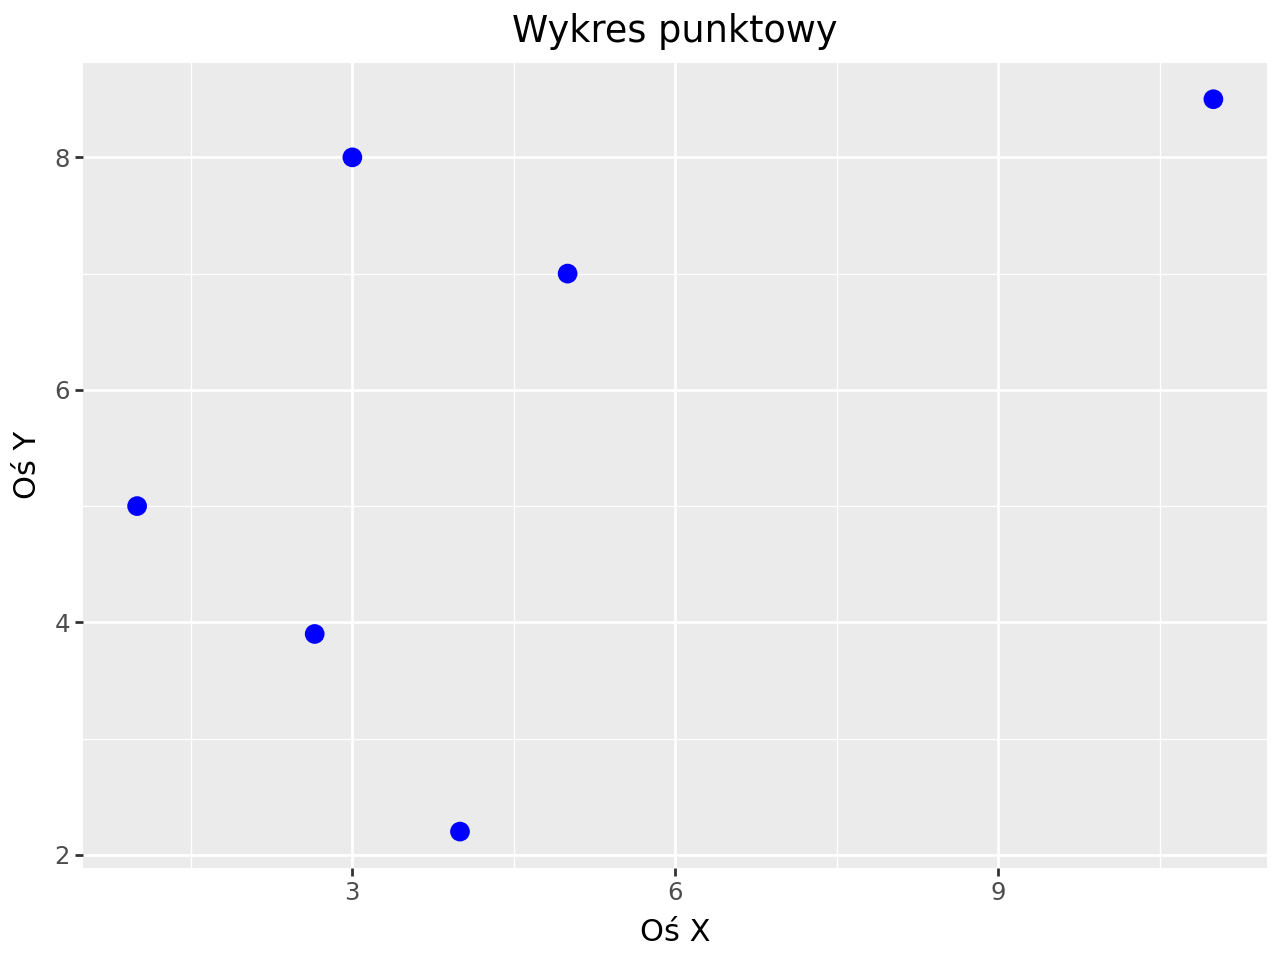

In [49]:
ggplot(data) + aes(x="x", y="y") + geom_point(color="blue", size=3) + ggtitle("Wykres punktowy") + xlab("Oś X") + ylab("Oś Y")

In [50]:
data_bar = pd.DataFrame({
    "categories": ["P", "Q", "R", "S", "T"],
    "values": [6, 2, 9, 5, 7]
})

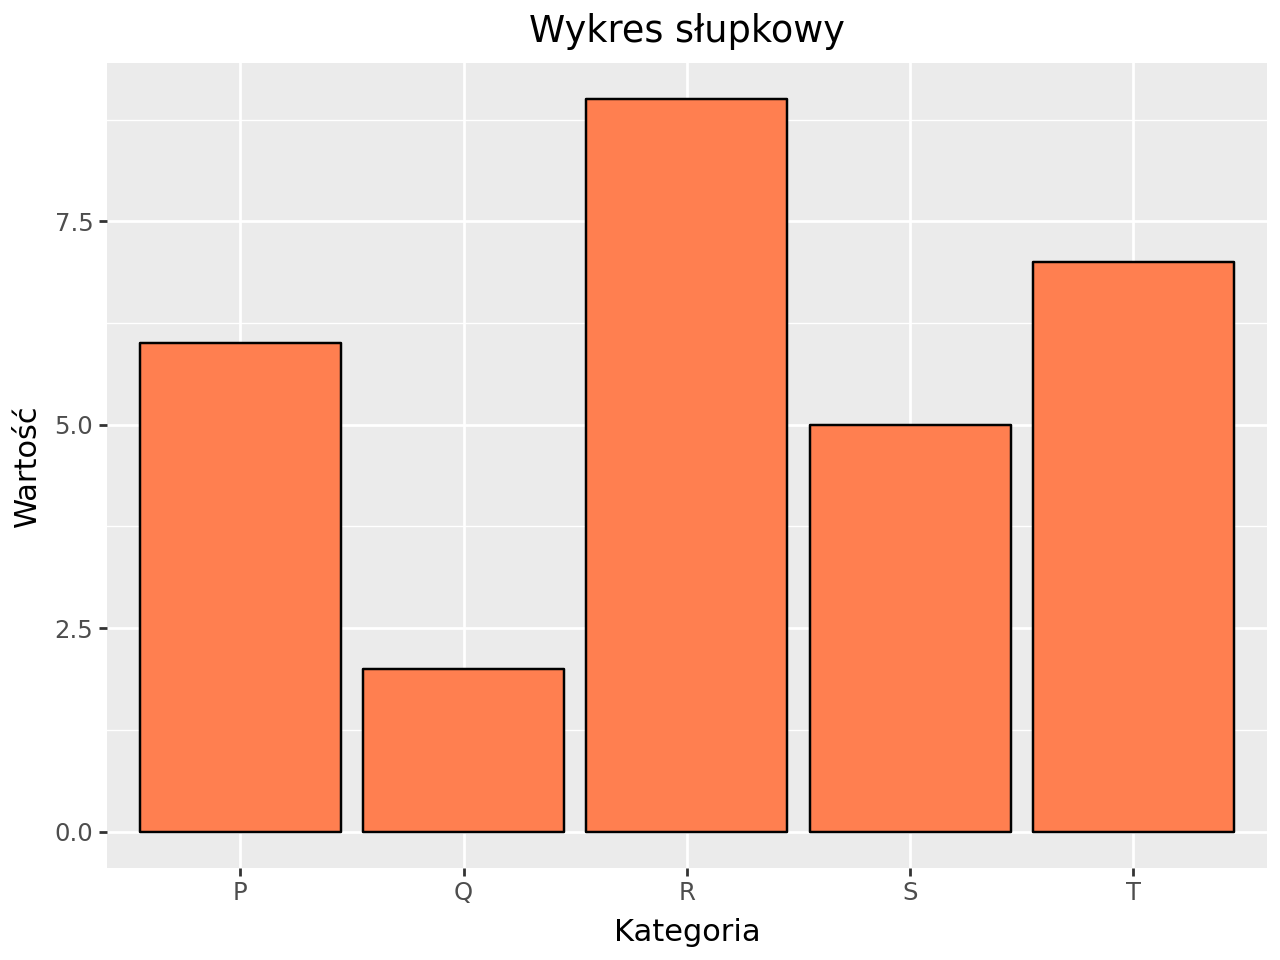

In [52]:
ggplot(data_bar) + aes(x="categories", y="values") + geom_bar(stat="identity", fill="#FF7F50", color="black") + ggtitle("Wykres słupkowy") + xlab("Kategoria") + ylab("Wartość")

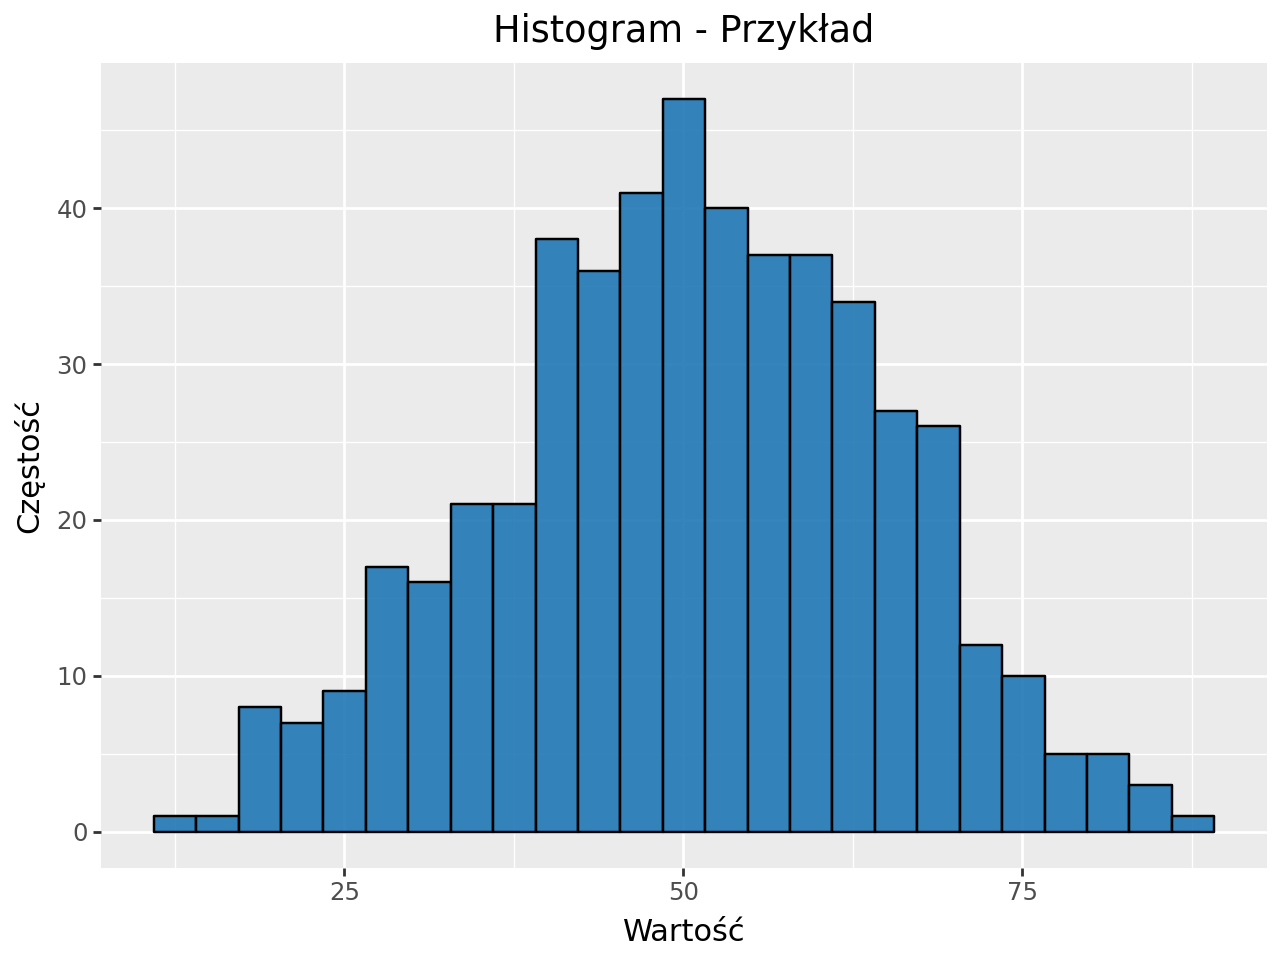

In [53]:
data_hist = pd.DataFrame({
    "values": np.random.normal(50, 15, 500)
})

ggplot(data_hist) + aes(x="values") + geom_histogram(bins=25, fill="#1f77b4", color="black", alpha=0.9) + xlab("Wartość") + ylab("Częstość") + ggtitle("Histogram - Przykład")

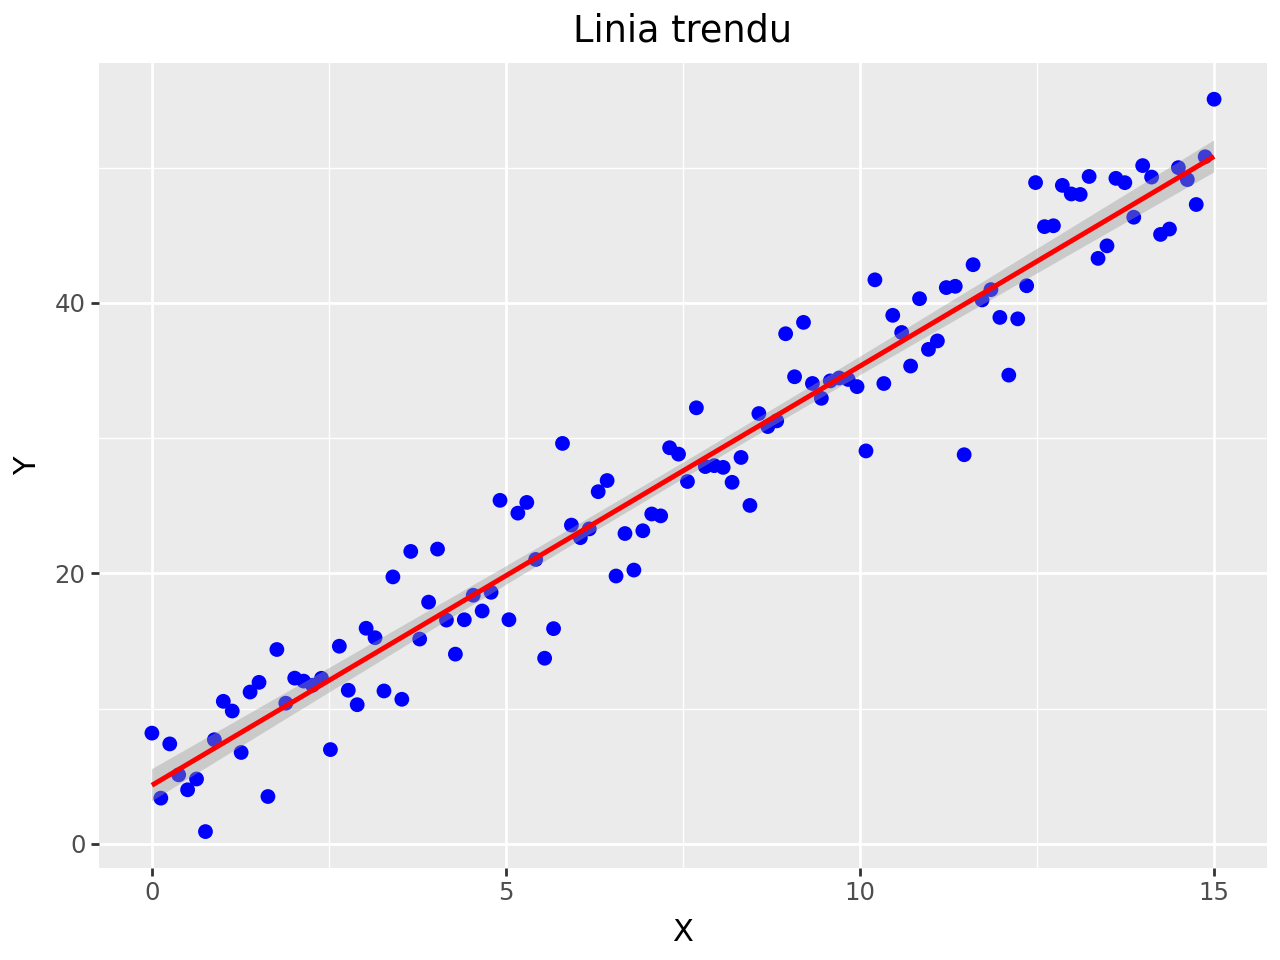

In [54]:
const = 4
slope = 3
intercept = 5

data_trend = pd.DataFrame({
    "x": np.linspace(0, 15, 120),
    "y": (slope * np.linspace(0, 15, 120) + intercept + np.random.normal(0, 3, 120))
})

ggplot(data_trend) + aes(x="x", y="y") + geom_point(color="blue", size=2) + geom_smooth(color="red", method="lm") + ggtitle("Linia trendu") + xlab("X") + ylab("Y")

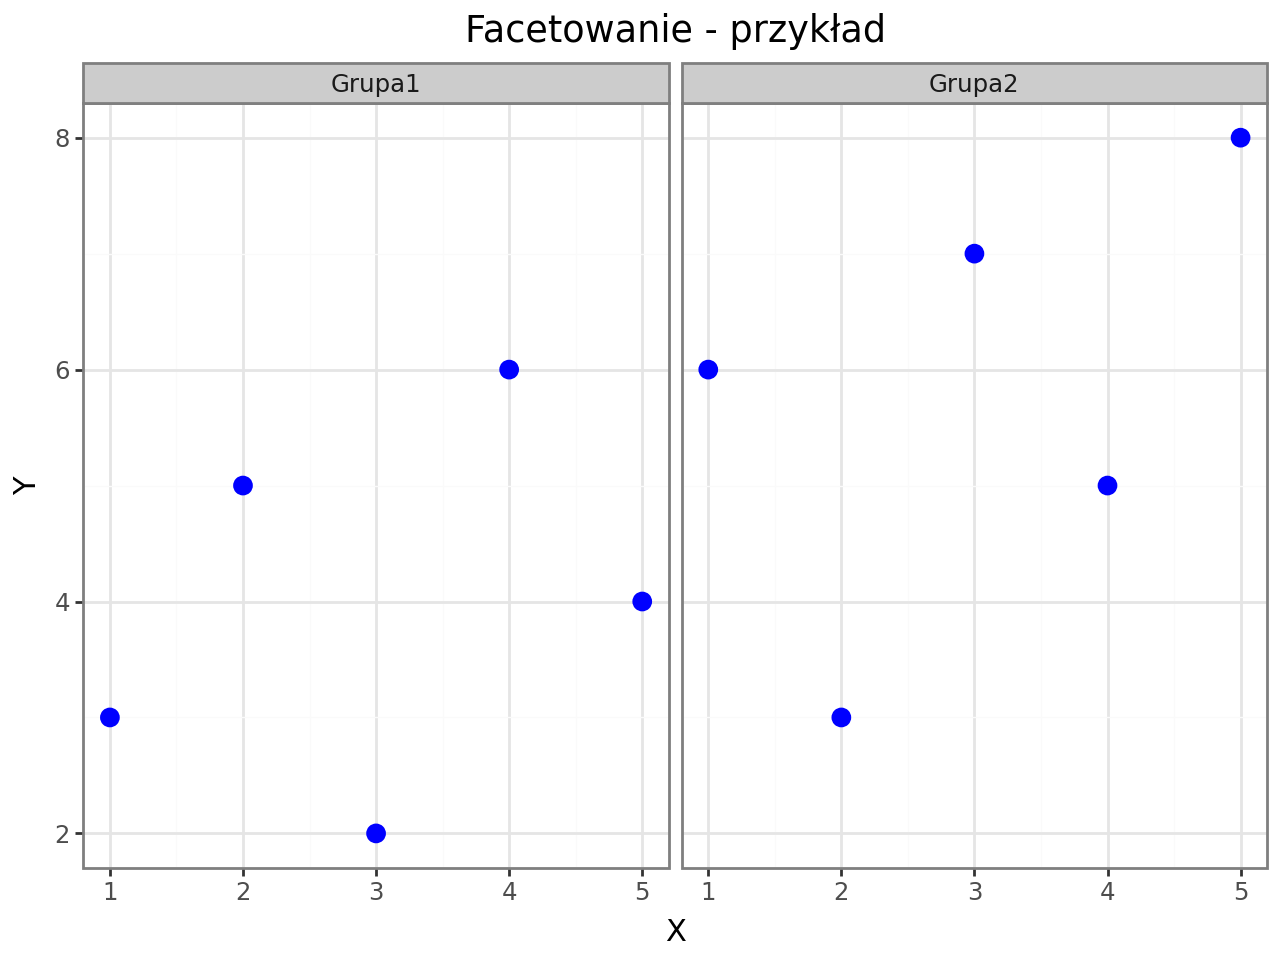

In [56]:
data_facet = pd.DataFrame({
    "x": list(range(1, 6)) * 2,
    "y": [3, 5, 2, 6, 4, 6, 3, 7, 5, 8],
    "group": ["Grupa1"]*5 + ["Grupa2"]*5
})

ggplot(data_facet, aes(x="x", y="y")) + geom_point(color="blue", size=3) + facet_wrap("~group") + ggtitle("Facetowanie - przykład") + xlab("X") + ylab("Y") + theme_bw()

**Wizualizacja danych za pomocą Python (wykresy przestrzenne)**

In [57]:
import plotly.express as px
import pandas as pd

In [58]:
data_map = pd.DataFrame({
    "city": ["Paris", "Berlin", "Toronto", "Sao Paulo", "Cape Town", "Bielsko-Biała"],
    "latitude": [48.8566, 52.5200, 43.6532, -23.5505, -33.9249, 49.8225],
    "longitude": [2.3522, 13.4050, -79.3832, -46.6333, 18.4241, 19.0444]
})

In [63]:
fig = px.scatter_mapbox(data_map, lat="latitude", lon="longitude", hover_name=("city"),zoom=1.2, height=500, color_discrete_sequence=["red"])
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title="Lokalizacja miast ze zbioru na mapie")
fig.show()

In [60]:
data = px.data.gapminder().query("year == 2007")

fig = px.choropleth(data,
                    locations="iso_alpha",
                    color="gdpPercap",
                    hover_name="country",
                    hover_data={"lifeExp": True, "pop": True},
                    color_continuous_scale="Plasma",
                    range_color=(0, 70000),
                    labels={"gdpPercap": "PKB na mieszkańca (USD)", "lifeExp": "Life Expectancy", "pop": "Population"}
                    )

fig.update_layout(title="PKB na mieszkańca w różnych państwach (2007)")
fig.show()